# Density Estimation: Practical Lesson
### Data Science I


##### Thanks to Cristobal Donoso & Guillermo Cabrera
September 28, 2018

In [5]:
import pandas as pd
import numpy as np
import pylab as plt

## Introduction

In this tutorial we will use Astronomical Data from SDSS (Sloan Digital Sky Survey)

In [6]:
df = pd.read_csv('guille/data/SDSS_Gals.csv')
df.head()

,z,petroRad_r_kpc,absPetroMag_r
0,0.123945,16.159371,-21.933832
1,0.091500,10.336046,-21.383353
2,0.077116,15.770359,-21.973098
3,0.185233,18.595973,-21.888694
4,0.094941,8.508556,-21.342373


The goal of density estimation is to build a probability density function by using data.

<img src='guille/images/density_estimation.png' />

The most straightforward way is to use **Histogram**

### 1.1 Histogram

In [7]:
z = np.array(df['z'])
print(min(z), max(z))

0.00011789927 0.33818287


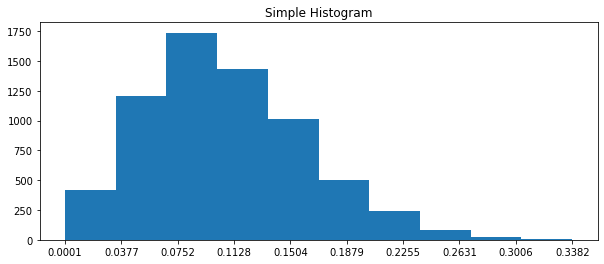

In [8]:
plt.figure(figsize=(10,4))
n, _, _ = plt.hist(z, bins = 10)
plt.title('Simple Histogram')
plt.xticks(np.linspace(min(z),max(z), 10))
plt.show()
# print(n) #The values of the histogram bin

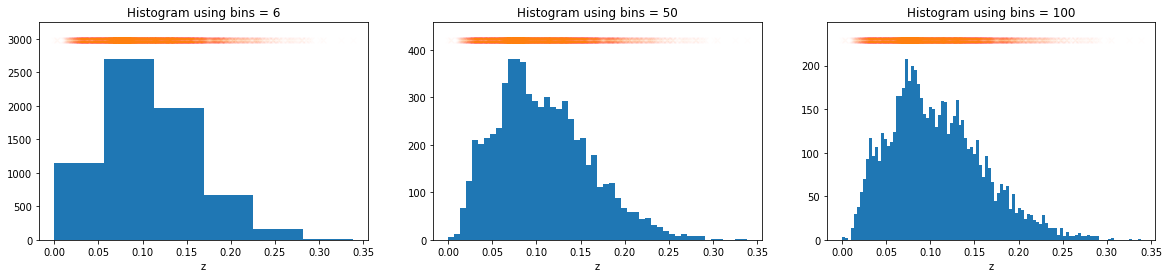

In [9]:
bins = [6, 50, 100]

plt.figure(figsize=(20,4))
for index, b in enumerate(bins):
    pos = int(str(13)+str(index+1))
    plt.subplot(pos)
    
    n, _, _ = plt.hist(z, bins = b)
    plt.plot (z, np.ones(len(z))*n.max()*1.1, "x", alpha = 0.01)
    plt.title('Histogram using bins = '+str(b))
    plt.ylim([0, n.max()*1.2])
    plt.xlabel("z")
plt.show()

In order to improve the estimation: 
- each point could have it’s own bin. 
- We also allow the bins to overlap. 
- Each point is replaced by a box of unit height and some predefined width

The box is usually named **KERNEL**

### 1.2 Kernel Density Estimation

* "Non-parametric” density estimation.
* Each data point is described by a kernel.
* The probability density function is estimated as the sum of the kernels
* $K_{h}$ is named the scaled kernel $K_{h}(x) = \frac{1}{h} K(\frac{x}{h})$
* $\hat{f}_h(x) = \frac{1}{n}\sum K_h(x-x_i) = \frac{1}{nh}\sum K(\frac{x-x_i}{h})$
* $h$ is the badwidth parameter that defines the size of the Kernel. We want to choose the h as small as the data will allow.

#### Available Kernels
<img  height="150" width="450" style='float: right;' src='./guille/images/kernels.png'>
<p style='float: left;'>
- Gaussian kernel $\rightarrow$ (kernel = 'gaussian')<br><br>
- Tophat kernel $\rightarrow$ (kernel = 'tophat')<br><br>
- Epanechnikov kernel $\rightarrow$ (kernel = 'epanechnikov')<br><br>
- Exponential kernel $\rightarrow$ (kernel = 'exponential')<br><br>
- Linear kernel $\rightarrow$ (kernel = 'linear')<br><br>
- Cosine kernel $\rightarrow$ (kernel = 'cosine')<br><br>
</p>

$g(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-(1 / 2)((x-\mu) / \sigma)^{2}}$

In [10]:
def gaussian_kernel(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - np.power(x - mu,2) / (2 * np.power(sigma,2)) )

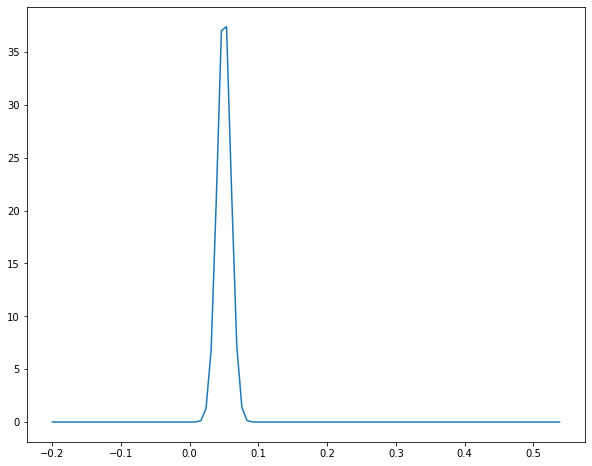

In [11]:
grid = np.linspace(z.min()-0.2, z.max()+0.2, 100)
plt.figure(figsize = (10,8))
plt.plot(grid, gaussian_kernel(grid, mu = 0.05, sigma = 0.01))
plt.show()

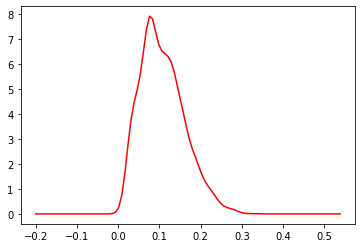

In [12]:
images = []
density_estimation = np.zeros(len(grid))
fig = plt.figure()
for x in z:
#     plt.plot(x, 0, '*k')
    kernel = gaussian_kernel(grid, mu = x, sigma = 0.01)
    density_estimation += kernel / len(z)
#     plt.plot(grid, kernel/6, 'k', alpha = 0.2)
line1, = plt.plot(grid, density_estimation,'r-',)
plt.savefig("img/kde1.png")
plt.show()

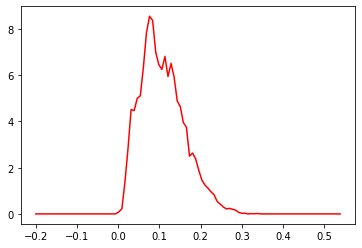

In [13]:
images = []
density_estimation = np.zeros(len(grid))
fig = plt.figure()
for x in z:
#     plt.plot(x, 0, '*k')
    kernel = gaussian_kernel(grid, mu = x, sigma = 0.003)
    density_estimation += kernel / len(z)
#     plt.plot(grid, kernel/6, 'k', alpha = 0.05)
line1, = plt.plot(grid, density_estimation,'r-',)
plt.savefig("img/kde2.png")
plt.show()

In [14]:
from sklearn.neighbors import KernelDensity
#https://scikit-learn.org/stable/modules/density.html

In [15]:
kde = KernelDensity(kernel='gaussian',bandwidth = 1e-2)
kde.fit(z[:, None])

KernelDensity(algorithm='auto', atol=0, bandwidth=0.01, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

Mathematically, a kernel is a positive function $K(x;h)$ which is controlled by the bandwidth parameter $h$. Given this kernel form, the density estimate at a point  within a group of points $x_i,\ i = 1,...,N$ is given by:
<center>$
\begin{equation}
p_K(x) = \sum_{i=1}^NK(\frac{x-x_i}{h})
\end{equation}
$</center>

In [16]:
x = np.arange(0, 0.5, 0.01)
# score_samples returns the log of the probability density
prob = np.exp(kde.score_samples (x[:, None]))

How do we choose the number of bins / bins size?
* Assuming an underlying Gaussian distribution: Scott's rule: $h=3.5\sigma/N^{1/3}$, where $\sigma$ is the sample standard deviation and $N$ the number of data points.
* non-Gaussian distributions: Freedman-Diaconis rule: $h= 2(q_{75}-q_{25})/N^{1/3}$, where $q_{75}$ and $q_{25}$ are quartiles 75 and 25 respectively.
* cross-validation (much more expensive).


In [17]:
def scott_rule(z):
    return 3.5 * z.std()/(len(z)**(1./3.))

In [18]:
def freedman(z):
    return 2* (np.percentile(z, 75) -np.percentile(z, 25)) /(len(z)**(1./3.))

bins =  34


/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


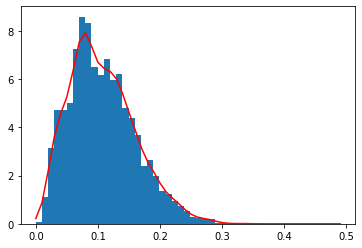

In [19]:
dh = scott_rule(z)
bins = np.round((z.max() - z.min())/dh).astype(int)
print ("bins = ", bins)

plt.clf()
plt.hist(z, bins = bins, normed=True)
plt.plot(x, prob, "r")
plt.show()

bins =  44


/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


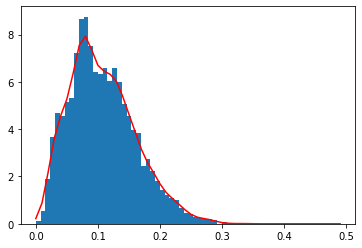

In [20]:
## histogram "Freedman-Diaconis"
dh = freedman(z)
bins = np.round((z.max() - z.min())/dh).astype(int)
print ("bins = ", bins)

plt.clf()
plt.hist(z, bins = bins, normed=True)
plt.plot(x, prob, "r")
plt.show()

## Selecting $h$ using cross-validation
Given n data points in the original sample then, n-p samples are used to train the model and p points are used as the validation set. This is repeated for all combinations in which original sample can be separated this way, and then the error is averaged for all trials, to give overall effectiveness (*).
### Mean integrated square error

As we noticed, the value of $h$ can have a big impact on our probability density function. In order to select a suitable bandwidth $h$, we minimize the mean integrated squared error (mise):
Why mise?, because, we want to control the overall MSE of the entire function and not only in a point. In this case, a straight forward generalization is the mean integrated square error (MISE):

MISE$_h$ = $\int(\hat{f}_h(x) - f(x))^2dx = \int\hat{f}_h^2dx - 2\int\hat{f}_hf(x)dx + \int f^2(x)dx$

* $\int\hat{f}_h^2dx$ computable from the data
* $\int f^2(x)dx$ does not depend on $h$
* $\int\hat{f}_hf(x)dx = \mathbb{E}_x(\hat{f}_h(x))$, where the expectation is computed with respect to an additional and independent observation $x$.

In order to estimate this last term, we define the _leave one out_ estimate 

$\hat{\mathbb{E}}_x(\hat{f}_h(x)) =  \frac{1}{n}\sum_{i = 1}^n \hat{f}_{h, -i}(x_i)$,

where $\hat{f}_{h, -i}(x)$ is the estimated density leaving out the $i$th data point. Using all this we can define the _cross-validation least-square score_

$CV(h) = \int\hat{f}_h^2(x)dx -\frac{2}{n}\sum_{i = 1}^n \hat{f}_{h, -i}(x_i)$,

and the optimum value of $h$ is found by

$\hat{h}_CV = $argmin$_h CV(h)$.

### Likelihood cross-validation

When doing density estimation we are actually estimating the pdf of our parameters. In that sense, we can use our test set (leave-one-out) to directly estimate the likelihood of that set of points. If we consider the likelihood cost for KDE, for which we have the leave-one-out likelihood cross-validation, then the cost is simply the sum over all points in the data s et (i.e., i = 1, . . . , N ) of the log of the likelihood of the density, where the density,
$\hat{f}_{h,−i} (x_i)$, is estimated leaving out the i th data point.

$CV_l(h) = \frac{1}{N}\sum_{i=1}^N\log{\hat{f}_{h,−i} (x_i)}$

and the optimum value of $h$ is found by

$\hat{h}_CV_l = $argmax$_h CV_l(h)$.

In [21]:
from sklearn.model_selection import GridSearchCV 

#z = np.array(df['z'])
z = np.array(df.sample(5000)['z'])

# Use grid search cross-validation to optimize the bandwidth
# Exhaustive search over specified parameter values for an estimator.
params = {'bandwidth': np.logspace(-3, 0, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(z[:, None])

# We extract just the scores (total log probability under the model.)

scores = [x for x in grid.cv_results_["mean_train_score"]]
# scores

/home/daniel/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/daniel/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [22]:
grid.best_estimator_.bandwidth

0.006158482110660267

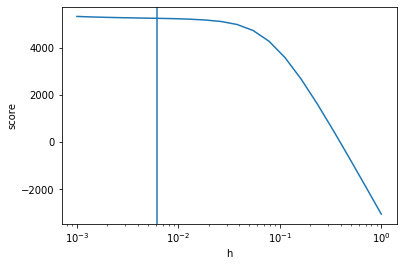

In [23]:
plt.clf()
plt.plot(params['bandwidth'], scores)
plt.xlabel ("h")
plt.ylabel ("score")
plt.axvline(grid.best_estimator_.bandwidth)
plt.xscale("log")
plt.show()

/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


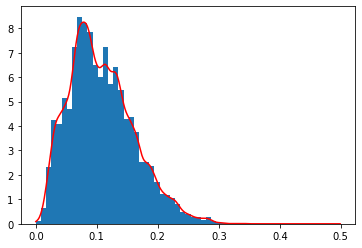

In [25]:
x = np.arange(0, 0.5, 0.001)
pdf = np.exp(grid.best_estimator_.score_samples(x[:, None]))


dh = freedman(z)
b = int(np.round((z.max() - z.min())/dh))

plt.clf()
plt.hist(z, bins = b, normed = True)
plt.plot(x, pdf, "r")
plt.show()

Lets do something a bit more interesting: density of galaxies in terms of their radius and magnitude (and redshift).

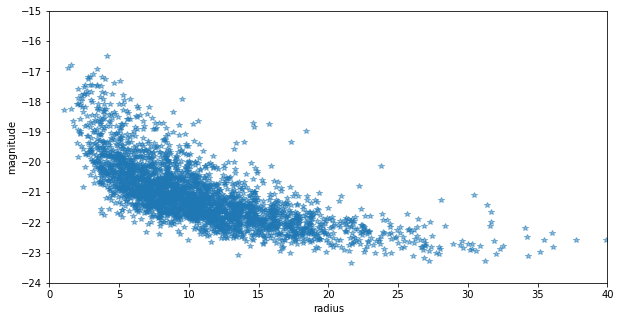

In [26]:
sample_1000 = df.sample(3000)
data = np.array([sample_1000['petroRad_r_kpc'], sample_1000['absPetroMag_r']]).transpose()

plt.figure(figsize=(10,5))
plt.plot(data[:, 0], data[:, 1], '*', alpha=0.5)
plt.xlim([0, 40])
plt.ylim([-24, -15])
plt.xlabel("radius")
plt.ylabel("magnitude")
plt.show()


In [29]:
# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-3, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

x = np.arange(.0, 40, 1)
y = np.arange(-24, -15, 0.2)

X, Y = np.meshgrid(x, y)
XY = np.array([X.flatten(), Y.flatten()]).transpose()

pdf = np.exp(grid.best_estimator_.score_samples (XY)).reshape(X.shape)


/home/daniel/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


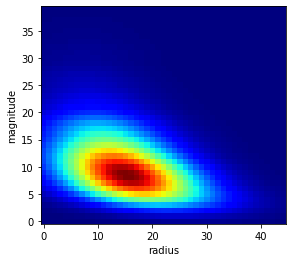

In [30]:
plt.figure()
plt.imshow(pdf.transpose(), interpolation='none', cmap=plt.cm.jet, origin='lower',clip_on=True)
plt.xlabel("radius")
plt.ylabel("magnitude")
plt.show()

KernelDensity(algorithm='auto', atol=0, bandwidth=1.438449888287663,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)
(1000, 2) [  4.97644475 -20.14325075]


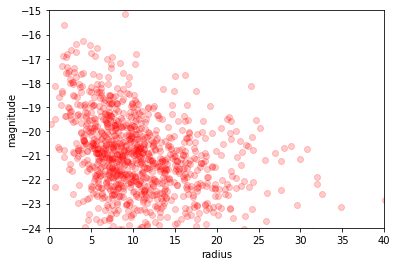

In [31]:
# Once the model is fitted we can even sample from it!
print (grid.best_estimator_)
new_data = grid.best_estimator_.sample(1000, random_state=0)
print (new_data.shape, new_data[0])

plt.clf()
plt.plot(new_data[:, 0], new_data[:, 1], "ro", alpha = 0.2)
plt.xlabel("radius")
plt.ylabel("magnitude")
plt.xlim([0, 40])
plt.ylim([-24, -15])
plt.show()


## Gaussian Mixture Model

<img src="guille/images/GMM1.png" style="height: 200px;"><img src="guille/images/GMM2.png" style="height: 200px;"><img src="guille/images/GMM3.png" style="height: 200px;">

latent variable: $z\in \{e_1, \ldots, e_m\}$

$e_1 = (1, 0, 0,\ldots, 0), \cdots, e_m = (0, 0, 0,\ldots, 1)$

$P(z=e_k) = \alpha_k$

$p(\boldsymbol{x}|z = e_k) = N(\boldsymbol{x}|\mu_k, C_k)$

$p(\boldsymbol{x}) = \sum_zp(\boldsymbol{x}|z)P(z) = \sum_z\alpha_kN(\boldsymbol{x}|\boldsymbol{\mu}_k, C_k)$

$P(z=e_k|\boldsymbol{x}) = \frac{\alpha_kN(\boldsymbol{x}|\boldsymbol{\mu}_k, C_k)}{p(\boldsymbol{x})}$

#### Expectation-Maximization

* E-step: calculate the expected joint (data + latent variable) log-likelihood at iteration t.
* M-step: maximize such likelihood in terms of the model parameters.
  $\theta=(\alpha, \{\boldsymbol{\mu}_k\}, \{C_k\})$
  
How?

* $Z ={z_{i,k}}$ describes which Gaussian $k$ generated each sample $\boldsymbol{x}_i$.
* $z_{i,k} = 1$ if Gaussian $k$ emitted $\boldsymbol{x}_i$.
* Expected log-likelihood:

  $\mathbb{E}_Z[\log p(X, Z|\theta)|X, \theta^t]=\sum_{i,k}\mathbb{E}_Z[z_{i,k}|X, \theta^t]\log \alpha_k^t + \mathbb{E}_Z[z_{i,k}|X, \theta^t]\log N(\boldsymbol{x}|\mu_k^t, C_k^t)$

  $\mathbb{E}_Z[z_{i,k}|X, \theta^t]=\frac{\alpha_k^tN(\boldsymbol{x}_i|\mu_k^t, C_k^t)}{\sum_k\alpha_k^tN(\boldsymbol{x}_i|\mu_k^t, C_k^t)}$
* Maximization:

  $\theta^{t+1} = \mathrm{argmin}_\theta[\mathbb{E}_Z[\log p(X, Z|\theta)|X, \theta^t]]$
  
  $\mu_k^{t+1} = \frac{\sum_i \boldsymbol{x}_iP(z_k|\boldsymbol{x}_i, \theta^t)}{\sum_iP(z_k|\boldsymbol{x}_i, \theta^t)}$
  
  $C_k^{t+1} = \frac{\sum_iP(z_k|\boldsymbol{x}_i, \theta^t)(\boldsymbol{x}_i - \boldsymbol{\mu}_i)(\boldsymbol{x}_i - \boldsymbol{\mu}_i)^\top}{\sum_iP(z_k|\boldsymbol{x}_i, \theta^t)}$
  
  $\alpha_k^{t+1} = \frac{1}{N}\sum_iP(z_k|\boldsymbol{x}_i, \theta^t)$
  
How many Gaussians should we use?

## Model Selection

As we have seen before, in order to compare different models, the prefered technique is cross-validation. Nevertheless, there are classical methods that are easy to use and often effective for simple models. Two of those are the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC).

### Information Criteria

Consider $M$ parameters for the model and $N$ data points. $L$ is the maximum value of the likelihood function for the estimated model.

#### Akaike Information Criterion  

AIC $=2M-2\ln(L)$

* Based on information theory.
* Suppose that the data is generated by some unknown process $f$ and consider two candidate models $\hat{f}_1$ and $\hat{f}_2$. 
* If we knew $f$ we could infer which model is better by using the K-L divergence. But we don't know $f$.
* [Akaike](http://ieeexplore.ieee.org/document/1100705/) showed, that we can estimate, via AIC, how much more (or less) information is lost by $\hat{f}_1$ than by $\hat{f}_2$. 

#### Bayesian Information Criterion 

BIC $= -2\ln(L) + M\ln(M)$

* BIC is estimated from the Bayesian interpretation of the model:
\begin{eqnarray}
   -2\ln p(x|M) & = & -2\ln \int p(x|M, \theta)p(\theta)\\
   & \sim & -2\ln L + M(\ln (N) - \ln(2\pi))
   \end{eqnarray}

In [78]:
from sklearn.mixture import GaussianMixture # sklearn 0.18

In [79]:
N_train = int(0.9*len(data))
data_train = data[:N_train]
data_test = data[N_train:]

In [86]:
Ns = np.arange(20) + 1 
models = [None for i in range(len(Ns))]
for i in range(len(Ns)):
    models[i] = GaussianMixture(Ns[i]).fit(data) # sklearn 0.18
    #print(models[i])

In [87]:
# compute the AIC and the BIC
AIC = [m.aic(data_train) for m in models]
BIC = [m.bic(data_train) for m in models]

# compute the cross-validated log-likelihood
logL = [m.score(data_test).mean() for m in models]

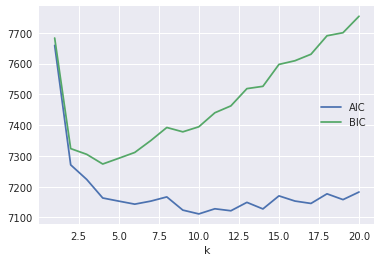

In [88]:
# plot metrics in terms of k
plt.clf()
plt.plot(Ns, AIC, label = "AIC")
plt.plot(Ns, BIC, label = "BIC")
plt.xlabel("k")
plt.legend (loc = "best")
plt.show()

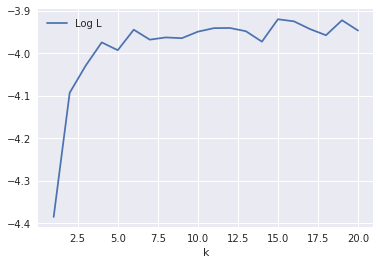

In [89]:
plt.clf()
plt.plot(Ns, logL, label = "Log L")
plt.xlabel("k")
plt.legend (loc = "best")
plt.show()

best model according to BIC with k = 4
((45, 40), (1800, 2))
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
(1800,)


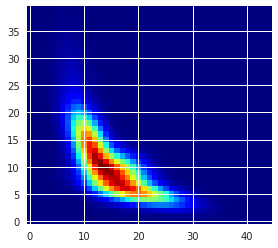

In [90]:
# plot the pdf of the best BIC model
print ("best model according to BIC with k = {0}".format( Ns[np.argmin(BIC)] ))
print (X.shape, XY.shape)
print (models[np.argmin(BIC)])
print (models[np.argmin(BIC)].score_samples (XY).shape)
pdf = np.exp(models[np.argmin(BIC)].score_samples (XY)).reshape(X.shape)

plt.clf()
plt.imshow(pdf.transpose(), interpolation='none', cmap=plt.cm.jet, origin='lower',clip_on=True)
plt.show()